<a href="https://colab.research.google.com/github/Jayesh-Ah/ME228-DS-ML/blob/main/me228_project_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **PREDICTIVE MODELLING FOR ONLINE BIKE RIDES REQUEST**

## Data Collection and Preprocessing

### Importing libraries

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Importing Dataset

In [4]:
import os
print(os.listdir())

['.config', 'sample_data']


In [5]:
from google.colab import files
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [6]:
import pandas as pd
df = pd.read_csv("SeoulBikeData.csv", encoding ='ISO-8859-1')

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')

df["Weekday"] = df["Date"].dt.day_name()
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

df.drop("Date", axis=1, inplace=True)

### Dataset View

In [10]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017


## Exploratory Data Analysis

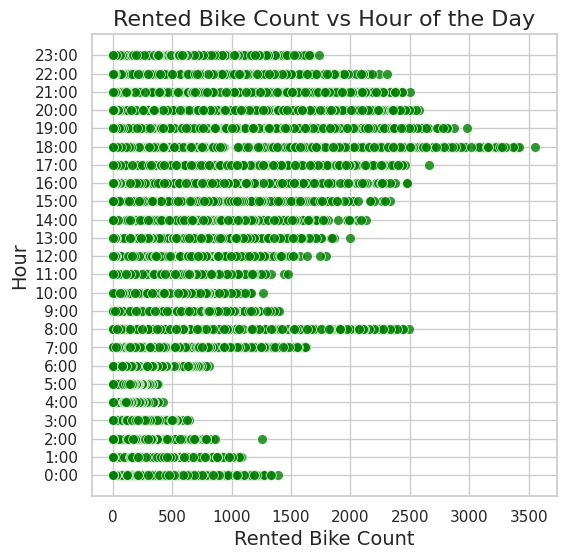

In [11]:
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Rented Bike Count', y='Hour', s=50, alpha=0.8, color='green')

# Set plot labels and title
plt.title('Rented Bike Count vs Hour of the Day', fontsize=16)
plt.xlabel('Rented Bike Count', fontsize=14)
plt.ylabel('Hour', fontsize=14)

# Customize the y-axis ticks to represent hours of the day
plt.yticks(range(24), [f'{hour}:00' for hour in range(24)])

plt.show()


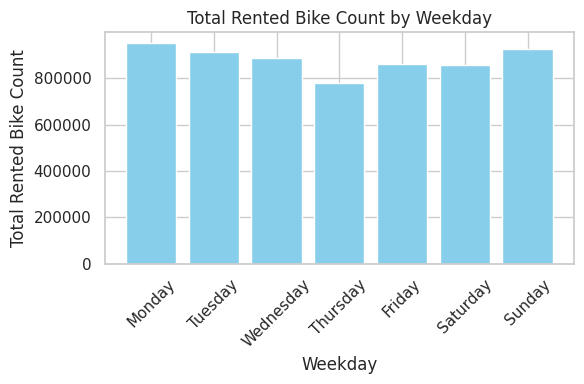

In [59]:
# Aggregate rented bike count by weekday
weekday_counts = df.groupby('Weekday')['Rented Bike Count'].sum()

# Define the weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(weekdays, weekday_counts, color='skyblue')
plt.title('Total Rented Bike Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Rented Bike Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Scatter Plot of Rented Bike Count vs Rainfall


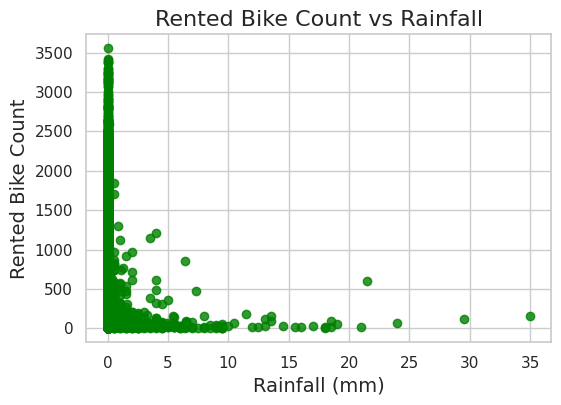

In [57]:
plt.figure(figsize=(6, 4))  # Adjust the figure size

# Scatter plot
plt.scatter(df['Rainfall(mm)'], df['Rented Bike Count'], alpha=0.8, color='green')

# Set plot labels and title
plt.title('Rented Bike Count vs Rainfall', fontsize=16)
plt.xlabel('Rainfall (mm)', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)

plt.show()


### Histogram and KDE Plot of Rented Bike Count vs Humidity

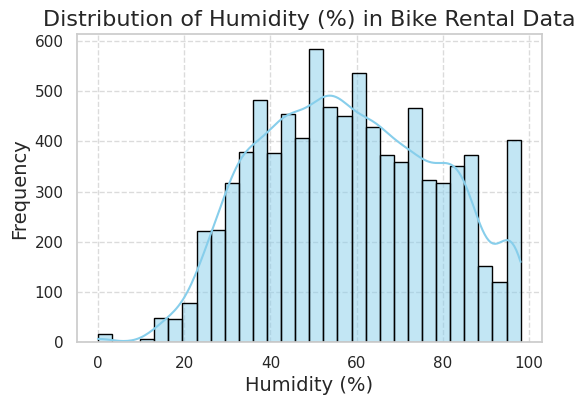

In [22]:
sns.set_style("whitegrid")

# Create the histogram plot
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Humidity(%)', bins=30, kde=True, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Humidity (%) in Bike Rental Data', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Joint Scatter Plot of Rented Bike Count vs Visibility

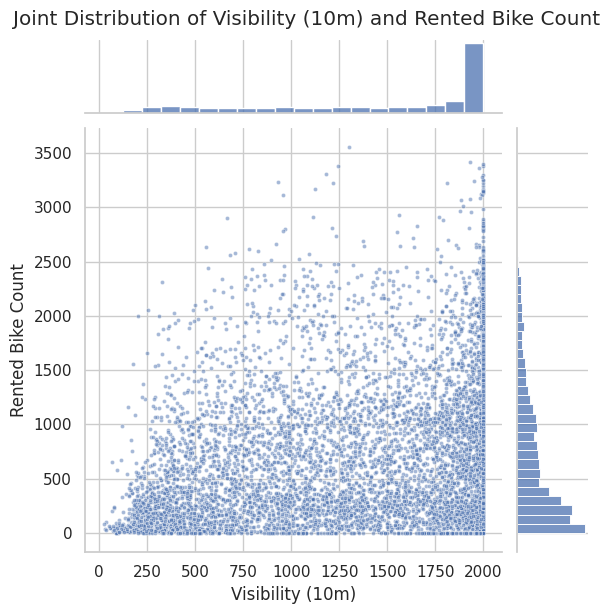

In [23]:
# Create the Jooint Scatter Plot
sns.jointplot(data=df, x='Visibility (10m)', y='Rented Bike Count', kind='scatter', marker='.', alpha=0.5)

# Add Title and labels
plt.suptitle('Joint Distribution of Visibility (10m) and Rented Bike Count', y=1.02)

plt.show()

### Barplot of Rented Bike Count vs Holiday

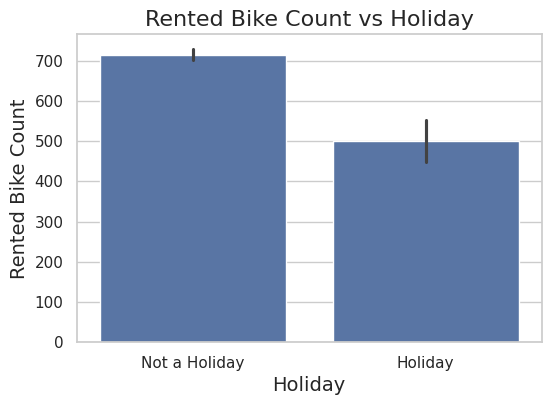

In [24]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(6, 4))  # Adjust the figure size
colors = sns.color_palette("pastel")
sns.barplot(data=df, x="Holiday", y="Rented Bike Count")

# Set plot labels and title
plt.title('Rented Bike Count vs Holiday', fontsize=16)
plt.xlabel('Holiday', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Not a Holiday', 'Holiday'], rotation=0)

plt.show()

### Barplot of Total Rented Bike vs Month

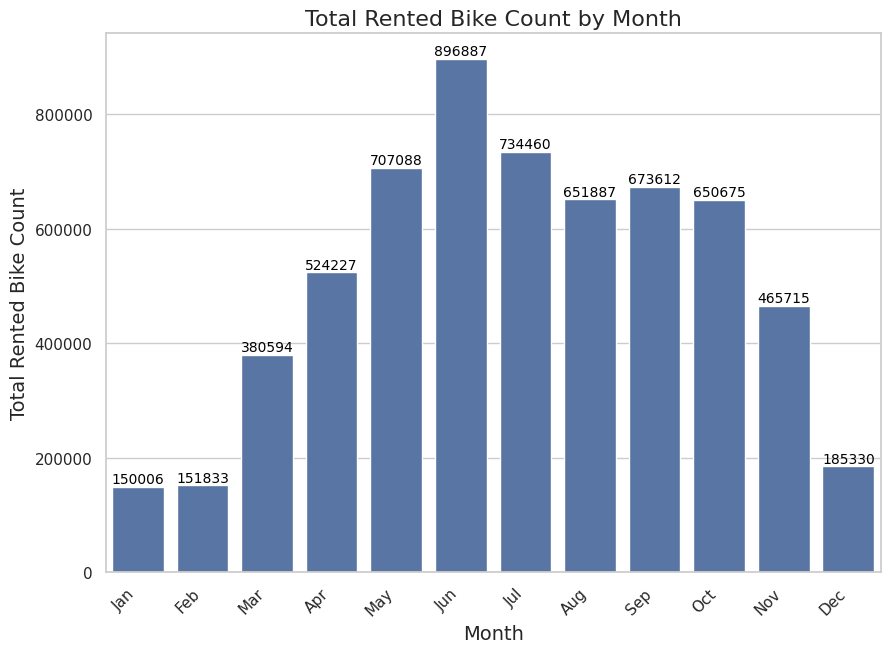

In [25]:
plt.figure(figsize=(10, 7))

# Grouping the data by month and summing the rented bike counts
Month = df.groupby("Month").sum().reset_index()
colors = sns.color_palette("viridis", n_colors=len(Month))

sns.barplot(x="Month", y="Rented Bike Count", data=Month)

# Adding title and labels
plt.title('Total Rented Bike Count by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Rented Bike Count', fontsize=14)

# Customizing x-axis labels
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=months_labels, rotation=45, ha='right')

# Adding data labels on each bar
for i, count in enumerate(Month["Rented Bike Count"]):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

### Box Plot of Continuous Variables

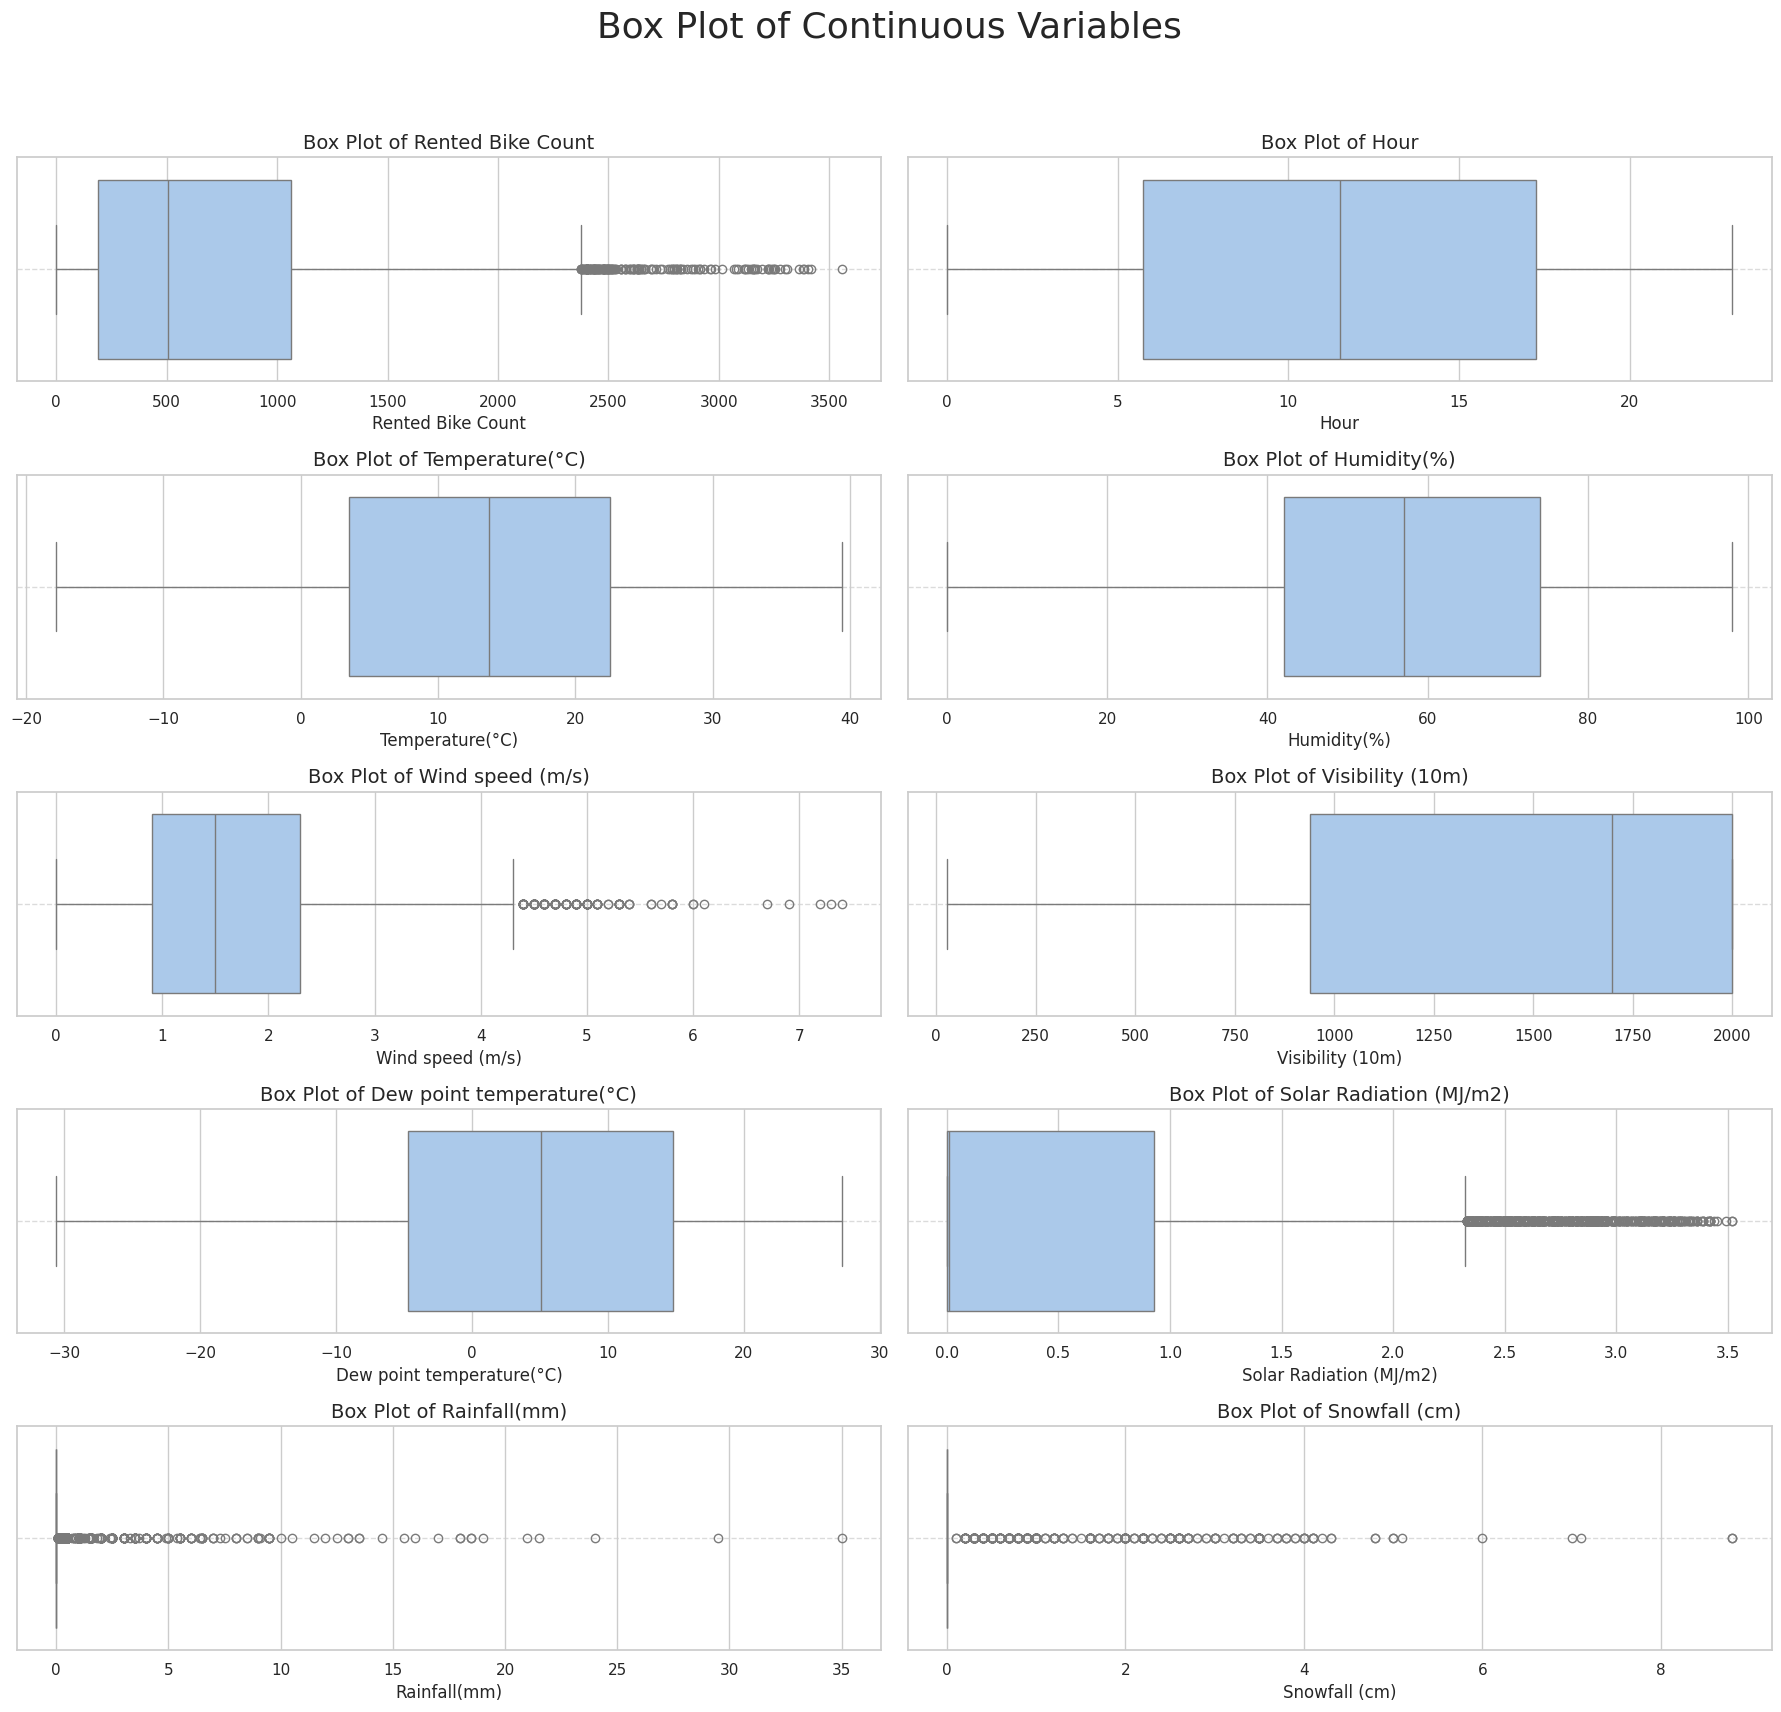

In [26]:
sns.set_palette("pastel")
plt.figure(figsize=(18, 18))

# Loop over each continuous column and create a box plot
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5, 2, i+1)
    sns.boxplot(data=df, x=col, ax=ax)

    # Add horizontal grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Set title and axis labels
    ax.set_title(f'Box Plot of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('')

# Adjust layout and add super title
plt.suptitle('Box Plot of Continuous Variables', fontsize=26)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## Feature Engineering

### Removing Multicollinearity

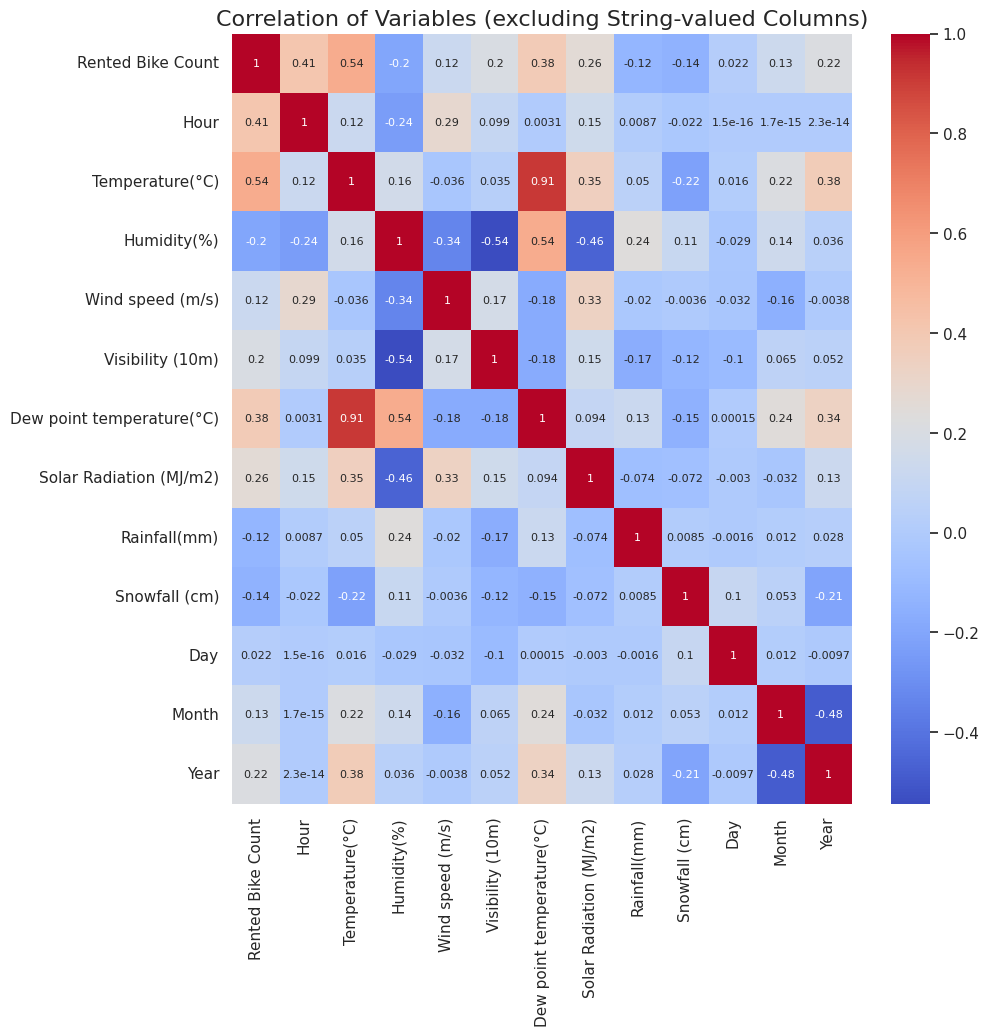

In [27]:
# Exclude 'String-valued columns' from the correlation computation
correlation_df = df.drop(columns=['Seasons', 'Weekday', 'Holiday', 'Functioning Day'])
plt.figure(figsize=(10, 10))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_df.corr(), annot=True, annot_kws={"size": 8}, cmap= 'coolwarm')
plt.title('Correlation of Variables (excluding String-valued Columns)', fontsize=16)
plt.show()

In [28]:
# Drop Highly Correlated Variables
df.drop(["Dew point temperature(°C)", "Visibility (10m)", "Solar Radiation (MJ/m2)", "Year"], axis=1, inplace=True)

In [29]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Weekday', 'Day', 'Month'],
      dtype='object')

### Encoding

Converting catergorical parameters into quantitative parameters

In [30]:
cat_feature = ["Holiday","Seasons", "Weekday", "Functioning Day"]

In [31]:
df["Holiday"].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [32]:
df["Seasons"].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [33]:
# Map the categorical columns to binary values
df["Holiday"] = df["Holiday"].map({"No Holiday":0, "Holiday":1})
df["Functioning Day"] = df["Functioning Day"].map({"No":0, "Yes":1})

### One-Hot Encoding

In [34]:
#One Hot-Encode these columns
df_season = pd.get_dummies(df["Seasons"], drop_first=True)
df_weekdays = pd.get_dummies(df["Weekday"], drop_first=True)

In [35]:
# Concatenate the one-hot encoded features with the original DataFrame
df = pd.concat([df, df_season, df_weekdays], axis=1)
df.drop(["Seasons", "Weekday"], axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature(°C)    8760 non-null   float64
 3   Humidity(%)        8760 non-null   int64  
 4   Wind speed (m/s)   8760 non-null   float64
 5   Rainfall(mm)       8760 non-null   float64
 6   Snowfall (cm)      8760 non-null   float64
 7   Holiday            8760 non-null   int64  
 8   Functioning Day    8760 non-null   int64  
 9   Day                8760 non-null   int32  
 10  Month              8760 non-null   int32  
 11  Spring             8760 non-null   bool   
 12  Summer             8760 non-null   bool   
 13  Winter             8760 non-null   bool   
 14  Monday             8760 non-null   bool   
 15  Saturday           8760 non-null   bool   
 16  Sunday             8760 

In [37]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,0.0,0.0,0,1,1,12,False,False,True,False,False,False,False,False,False
1,204,1,-5.5,38,0.8,0.0,0.0,0,1,1,12,False,False,True,False,False,False,False,False,False
2,173,2,-6.0,39,1.0,0.0,0.0,0,1,1,12,False,False,True,False,False,False,False,False,False
3,107,3,-6.2,40,0.9,0.0,0.0,0,1,1,12,False,False,True,False,False,False,False,False,False
4,78,4,-6.0,36,2.3,0.0,0.0,0,1,1,12,False,False,True,False,False,False,False,False,False


### Train-Test Splitting

In [38]:
x = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=44)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7008, 19)
(1752, 19)
(7008,)
(1752,)


### Scaling of Data

In [39]:
# Initialize the StandardScaler
sc = StandardScaler()
sc.fit(X_train)

# Fit the scaler to the training data and transform the training and testing data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# Print the scaled factor for each individual feature
sc.scale_

array([ 6.89891496, 11.89477346, 20.41030403,  1.03133328,  1.16637195,
        0.43086725,  0.21694036,  0.18295444,  8.7625287 ,  3.45754472,
        0.4362583 ,  0.43243447,  0.4311012 ,  0.34785544,  0.35063308,
        0.34903023,  0.35193387,  0.35106774,  0.34814986])

## Training Model
### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
Y_pred

array([ 412.64400255,  424.59171835, 1100.3224123 , ...,  753.1374205 ,
        890.13492001,  -40.91581084])

## Model Development

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
pip install xgboost

In [36]:
def get_metrics(Y_true, Y_pred, model_name):
    MSE = mean_squared_error(Y_true, Y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(Y_true, Y_pred)
    R2 = r2_score(Y_true, Y_pred)

    return {
        'Model Name': model_name,
        'MSE': MSE,
        'RMSE': RMSE,
        'MAE': MAE,
        'R2': R2
    }

# List to store metrics of all models
all_metrics = []

### Linear Reggression

In [37]:
metrics = get_metrics(Y_test, Y_pred, "Linear Regression")
print(metrics)
all_metrics.append(metrics)

{'Model Name': 'Linear Regression', 'MSE': 182012.37791967712, 'RMSE': 426.629087053001, 'MAE': 319.177648317277, 'R2': 0.5609446360185241}


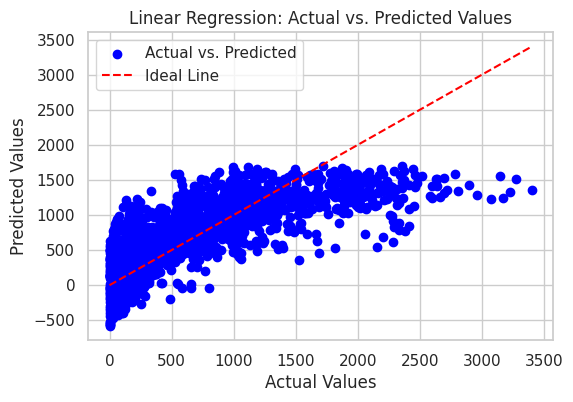

In [80]:
# Plot actual vs. predicted values
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, Y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

In [38]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Ridge Regression

In [39]:
ridge_model = Ridge().fit(X_train, Y_train)
Y_pred_ridge = ridge_model.predict(X_test)

In [40]:
metrics = get_metrics(Y_test, Y_pred_ridge, "Ridge Regression")
print(metrics)
all_metrics.append(metrics)

{'Model Name': 'Ridge Regression', 'MSE': 181997.32714844833, 'RMSE': 426.6114475121927, 'MAE': 319.14260459793695, 'R2': 0.560980941911099}


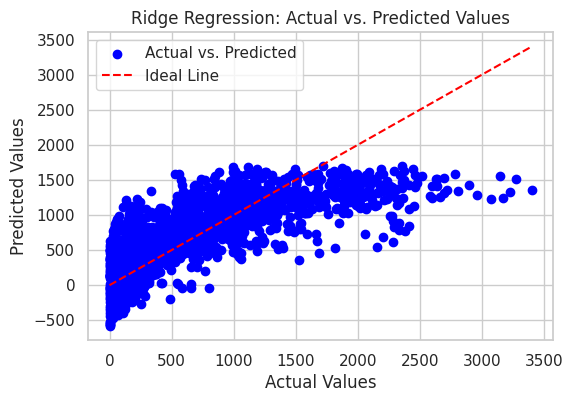

In [73]:
# Plot actual vs. predicted values
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, Y_pred_ridge, color='blue', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

### Lasso Regression

In [41]:
lasso_model = Lasso().fit(X_train, Y_train)
Y_pred_lasso = lasso_model.predict(X_test)

In [42]:
metrics = get_metrics(Y_test, Y_pred_lasso, "Lasso Regression")
print(metrics)
all_metrics.append(metrics)

{'Model Name': 'Lasso Regression', 'MSE': 182060.4078541962, 'RMSE': 426.68537337738235, 'MAE': 318.3292622074275, 'R2': 0.5608287768631012}


### Polynomial Regression

In [43]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_reg = LinearRegression().fit(X_train_poly, Y_train)
Y_pred_poly = poly_reg.predict(X_test_poly)

In [44]:
metrics = get_metrics(Y_test, Y_pred_poly, "Polynomial Regression")
print(metrics)
all_metrics.append(metrics)

{'Model Name': 'Polynomial Regression', 'MSE': 113619.00979783546, 'RMSE': 337.074190346629, 'MAE': 239.9170234018265, 'R2': 0.7259250372300612}


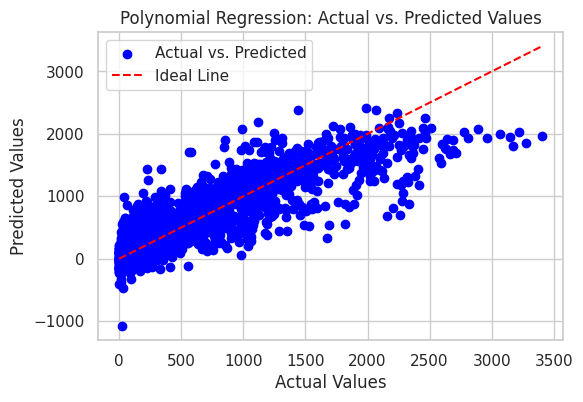

In [72]:
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, Y_pred_poly, color='blue', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

### Support Vector Regression

In [45]:
svr_model = SVR().fit(X_train, Y_train)
Y_pred_svr = svr_model.predict(X_test)

In [46]:
metrics = get_metrics(Y_test, Y_pred_svr, "Support Vector Regression")
print(metrics)
all_metrics.append(metrics)

{'Model Name': 'Support Vector Regression', 'MSE': 323607.10606829, 'RMSE': 568.864752000236, 'MAE': 387.826227477787, 'R2': 0.21938586064456378}


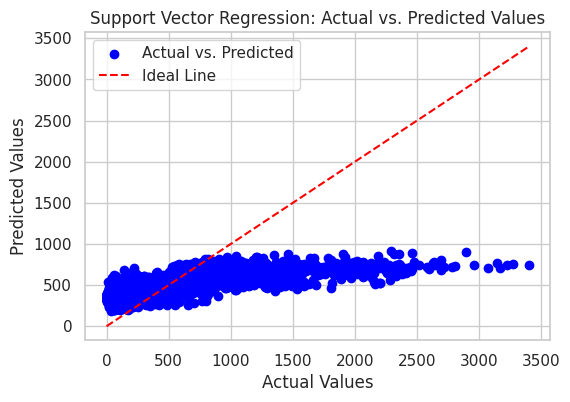

In [71]:
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, Y_pred_svr, color='blue', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

### Random Forest

In [47]:
RanForest_model = RandomForestRegressor().fit(X_train, Y_train)
Y_pred_RanForest = RanForest_model.predict(X_test)

In [48]:
metrics = get_metrics(Y_test, Y_pred_RanForest, "Random Forest Regression")
print(metrics)
all_metrics.append(metrics)

{'Model Name': 'Random Forest Regression', 'MSE': 28666.589858789957, 'RMSE': 169.3121078328126, 'MAE': 99.69441780821919, 'R2': 0.9308496477634446}


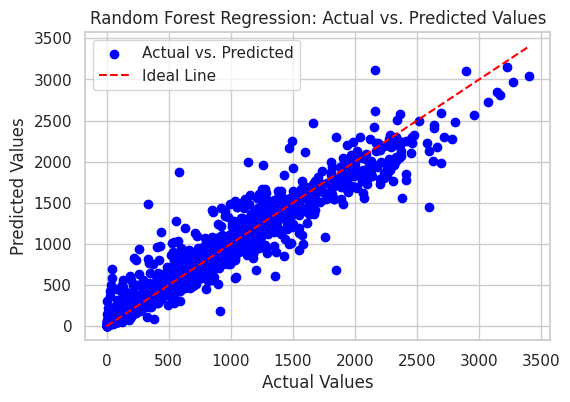

In [74]:
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, Y_pred_RanForest, color='blue', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

### K Nearest Neighbors Regressor

In [49]:
KNNreg_model = KNeighborsRegressor().fit(X_train, Y_train)
Y_pred_KNNreg = KNNreg_model.predict(X_test)

In [50]:
metrics = get_metrics(Y_test, Y_pred_KNNreg, "KNN Regression")
print(metrics)
all_metrics.append(metrics)

{'Model Name': 'KNN Regression', 'MSE': 109282.18810502283, 'RMSE': 330.57856570718985, 'MAE': 214.84303652968038, 'R2': 0.7363864401776175}


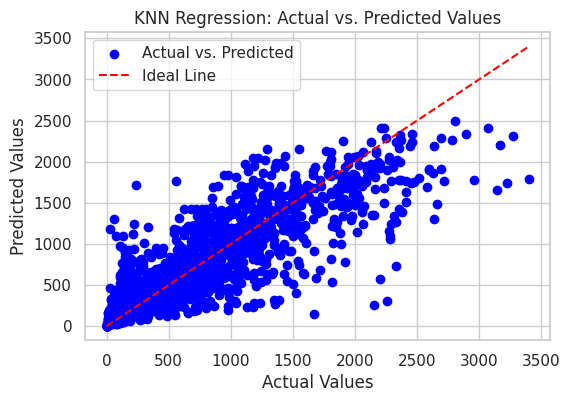

In [76]:
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, Y_pred_KNNreg, color='blue', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

### Decision Tree

In [51]:
DecTree_model = DecisionTreeRegressor().fit(X_train, Y_train)
Y_pred_DecTree = DecTree_model.predict(X_test)

In [52]:
metrics = get_metrics(Y_test, Y_pred_DecTree, "Decision Tree Regression")
print(metrics)
all_metrics.append(metrics)

{'Model Name': 'Decision Tree Regression', 'MSE': 65390.843607305935, 'RMSE': 255.71633425987073, 'MAE': 141.41780821917808, 'R2': 0.8422623726517577}


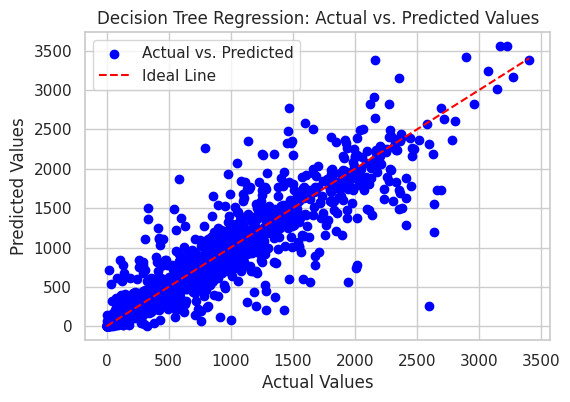

In [77]:
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, Y_pred_DecTree, color='blue', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

### XG Boost

In [53]:
XGBreg = XGBRegressor().fit(X_train, Y_train)
Y_pred_XGBreg = XGBreg.predict(X_test)

In [54]:
metrics = get_metrics(Y_test, Y_pred_XGBreg, "XGBoost Regression")
print(metrics)
all_metrics.append(metrics)

{'Model Name': 'XGBoost Regression', 'MSE': 23514.410740511143, 'RMSE': 153.344092616935, 'MAE': 96.64907438903367, 'R2': 0.9432778787657995}


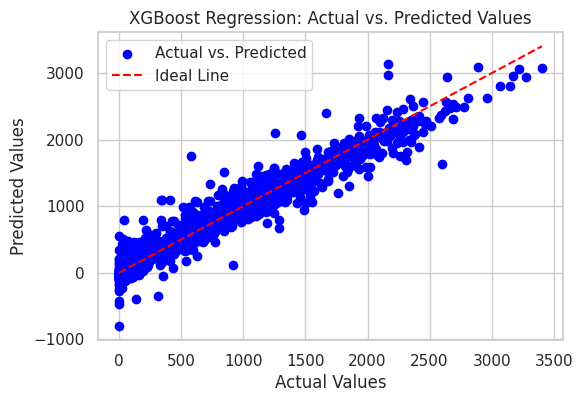

In [79]:
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, Y_pred_XGBreg, color='blue', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

### Hyper Parameter Tuning for Random Forest Regressor

In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the grid of hyperparameters for Random Forest model
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],                                             # Number of features to consider when looking for the best split
    'max_depth': [int(x) for x in np.linspace(10, 120, num=12)],                  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                                              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                                                # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                                                    # Whether bootstrap samples are used when building trees
}


In [ ]:
# Import the time module to measure the execution time
import time
start_time = time.time()

# Initialize a RandomForestRegressor model
RanForest = RandomForestRegressor()

# Initialize a RandomizedSearchCV model with the specified parameters
RanForest_random = RandomizedSearchCV(estimator=RanForest,
                                      param_distributions=random_grid,
                                      n_iter=100,
                                      cv=3,
                                      verbose=2,
                                      random_state=44)

# Fit the RandomizedSearchCV model on the training data
RanForest_random.fit(X_train, Y_train)

# Predict the target variable using the fitted model on the test data
Y_pred_RanForest_random = RanForest_random.predict(X_test)

# Calculate and print the time taken for training using randomized search
print("Time taken for training using randomize search: ", time.time() - start_time)


In [58]:
get_metrics(Y_test, Y_pred_RanForest_random, "Random Forest Regressor Fine Tuning")

{'Model Name': 'Random Forest Regressor Fine Tuning',
 'MSE': 28082.440026675467,
 'RMSE': 167.57816094788566,
 'MAE': 98.83081858828007,
 'R2': 0.9322587503755314}

In [59]:
RanForest_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [64]:
RanForest_tuned = RandomForestRegressor(n_estimators = 1200,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       max_features = 'auto',
                                       max_depth = 40,
                                       bootstrap = True)
RanForest_tuned.fit(X_train, Y_train)
Y_pred_RanForest_tuned = RanForest_tuned.predict(X_test)

metrics = get_metrics(Y_test, Y_pred_RanForest_tuned, "Random Forest Regressor with Best Parameters")
print(metrics)
all_metrics.append(metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'Model Name': 'Random Forest Regressor with Best Parameters', 'MSE': 28148.177643393265, 'RMSE': 167.7741864632139, 'MAE': 98.97537766362252, 'R2': 0.9321001762523581}


### Hyper Parameter Tuning for XGBoost Regressor

In [61]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
import time

# Define hyperparameters grid
params = {'max_depth': [3, 5, 6, 10, 15, 20],                        # Maximum depth of the tree
          'learning_rate': [0.01, 0.1, 0.2, 0.3],                    # Learning Rate for Boosting
          'subsample': np.arange(0.5, 1, 0.1),                       # Subsample Ratio of Training instances
          'colsample_bytree': np.arange(0.4, 1, 0.1),                # Subsample ratio of columns when constructing each tree
          'colsample_bylevel': np.arange(0.4, 1, 0.1),               # Subsample ratio of columns for each level
          'n_estimators': [100, 500, 1000]}                          # Number of trees in one ensemble

# Initialize XGBRegressor with seed
xgbr = XGBRegressor(seed=20)

# Initialize RandomizedSearchCV with specified parameters
rscv = RandomizedSearchCV(estimator=xgbr,
                          param_distributions=params,
                          scoring="neg_mean_squared_error",
                          n_iter=25,
                          cv=5,
                          verbose=1)

# Record the start time
start_time = time.time()

# Fit the RandomizedSearchCV model on the training data
rscv.fit(X_train, Y_train)

# Predict the target variable using the fitted model on the test data
Y_pred_xgb_random = rscv.predict(X_test)

# Print the time taken for training using randomized search
print("Time taken for training using randomize search: ", time.time()-start_time)

# Print the best parameters found by RandomizedSearchCV
print("Best parameters: ", rscv.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Time taken for training using randomize search:  273.5971853733063
Best parameters:  {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.4}


In [65]:
xgbr = XGBRegressor(subsample = 0.6,
                   n_estimators=1000,
                   max_depth=10,
                   learning_rate = 0.1,
                   colsample_bytree = 0.8999999999999999,
                   colsample_bylevel = 0.4,
                   seed = 20)

xgbr.fit(X_train, Y_train)
Y_pred_tuned = xgbr.predict(X_test)

metrics = get_metrics(Y_test, Y_pred_tuned, "XGBRegressor with Best Parameters")
print(metrics)
all_metrics.append(metrics)

{'Model Name': 'XGBRegressor with Best Parameters', 'MSE': 21048.586313124746, 'RMSE': 145.08130931696456, 'MAE': 86.02022917949718, 'R2': 0.9492260096229125}


## Model Evaluation and Comparison

In [66]:
# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(all_metrics)

# Sort the DataFrame by R2 score in ascending order
sorted_df = metrics_df.sort_values(by='R2', ascending=True)

# Reset the index for styling
sorted_df.reset_index(drop=True, inplace=True)

# Apply formatting to the DataFrame
formatted_df = sorted_df.style.format({
    'MSE': '{:.2f}',
    'RMSE': '{:.2f}',
    'MAE': '{:.2f}',
    'R2': '{:.3f}'
}).background_gradient(cmap='RdYlBu_r')

# Display the styled DataFrame
formatted_df

,Model Name,MSE,RMSE,MAE,R2
0,Support Vector Regression,323607.11,568.86,387.83,0.219
1,Lasso Regression,182060.41,426.69,318.33,0.561
2,Linear Regression,182012.38,426.63,319.18,0.561
3,Ridge Regression,181997.33,426.61,319.14,0.561
4,Polynomial Regression,113619.01,337.07,239.92,0.726
5,KNN Regression,109282.19,330.58,214.84,0.736
6,Decision Tree Regression,65390.84,255.72,141.42,0.842
7,Random Forest Regressor with Best Parameters,33347.57,182.61,114.48,0.920
8,Random Forest Regression,28666.59,169.31,99.69,0.931
9,Random Forest Regressor with Best Parameters,28148.18,167.77,98.98,0.932


## Conclusion

* The results indicate that ensemble methods like Random Forest and XGBoost outperform traditional linear models and other regression techniques in predicting bike rental demand.
* The fine-tuned XGBoost model demonstrates the highest predictive accuracy, highlighting the importance of hyperparameter tuning in optimizing model performance.
* Decision Tree Regression also shows promising results, suggesting that non-linear models can capture complex relationships in the data more effectively.
* Overall, the project successfully achieves the objective of developing accurate predictive models for bike rental demand forecasting, which can be valuable for bike rental companies in optimizing their operations and improving customer satisfaction.